# Example 23.4

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import norm 
from numpy import where,eye 

data = datasets.load_iris()

df = pd.DataFrame(data.data,columns=data.feature_names)
# ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
D = df.to_numpy()[:,[0,2]]
Y = df.to_numpy()[:,3]
n,d = D.shape
Dt = np.hstack((np.ones((n,1)),D))# augmented data matrix
n,d = Dt.shape
# Q,R = np.linalg.qr(Dt)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X0 = Dt[:,0]
X1 = Dt[:,1]
X2 = Dt[:,2]
U0 = X0
p10 = (X1.T) @ U0 / norm(U0)**2
U1 = X1 - p10*U0
p20 = (X2.T) @ U0 / norm(U0)**2
p21 = (X2.T) @ U1 / norm(U1)**2
U2 = X2 - p20*U0 - p21*U1
R = eye(d,d)
R[0,1] = p10
R[0,2] = p20
R[1,2] = p21
R

In [ ]:
Q = np.array([U0,U1,U2]).T

In [ ]:
Delta = np.diagflat([norm(U0)**2,norm(U1)**2,norm(U2)**2])
DeltaInv = np.diagflat([1/norm(U0)**2,1/norm(U1)**2,1/norm(U2)**2])
W = np.linalg.inv(R) @ DeltaInv @ Q.T @ Y
print(f"Y = {W[0]:.3f} + {W[1]:.3f} X1 + {W[2]:.3f} X2")

----------------------------
# Example 23.1 

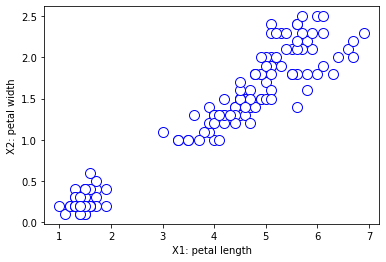

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_iris()

X = data.data[:,2]
Y = data.data[:,3]
plt.scatter(X,Y,s=100,facecolors="white",edgecolors="blue",alpha=1)
plt.xlabel("X1: petal length")
plt.ylabel("X2: petal width")
plt.show()


In [4]:
from numpy import cov,mean
W = cov(X,Y)[0,1]/cov(X,Y)[0,0]
b = mean(Y) - W * mean(X)
Yhat = b + W*X
SSE = sum((Y - Yhat)**2)

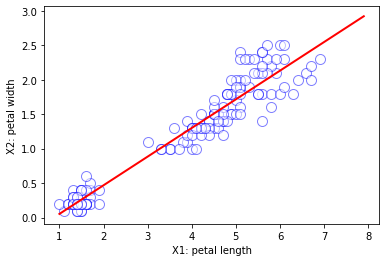

In [5]:
from numpy import arange    
x = arange(1,8,0.1)
y = b+W*x
plt.scatter(X,Y,s=100,facecolors="white",edgecolors="blue",alpha=0.5)
plt.plot(x,y,"red",lw=2)
plt.xlabel("X1: petal length")
plt.ylabel("X2: petal width")
plt.show()

-----------------------
# Example 23.3

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
from numpy import hstack,ones
from numpy.linalg import inv

data = datasets.load_iris()

X = data.data[:,[0,2]]
Y = data.data[:,3]
D = hstack((ones((150,1)),X))

W = inv(D.T @ D) @ (D.T @ Y)
W.round(3)

array([-0.009, -0.082,  0.449])

-----------------------
# Example 23.5

In [7]:
from sklearn import datasets
data = datasets.load_iris()
X = data.data[:,[0,2]]
Y = data.data[:,3]

### SGD ###
def SGD(X,Y,eta=0.001,eps=1e-4):
    n,d = X.shape
    Dt = hstack((ones((n,1)),X))
    W0 = np.random.randn(d+1)
    epoch = 1
    while True:
        ii = np.arange(n)
        np.random.shuffle(ii)
        for i in ii:
            x,y = Dt[i],Y[i]
            Dw = -x*(y-x@W0)
            W = W0 - eta*Dw
            chg = sum(abs(W/W0-1))
            if chg < eps: break
            W0 = W
        epoch += 1
        if epoch > 10000: break
    print(f"epoch {epoch} with W change: {chg:0.5f}")
    return W
    
W = SGD(X,Y)
print(W.round(3))

epoch 10001 with W change: 0.00295
[-0.007 -0.078  0.452]
